<a href="https://colab.research.google.com/github/FlavioAlm/ArangoDB/blob/main/arangoDB_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd

In [36]:
#Carga do relatório com resultados da execução do benchmark
arquivo = 'https://github.com/FlavioAlm/ArangoDB/raw/refs/heads/main/result_raw.xlsx'
results = pd.read_excel(arquivo, sheet_name='raw_tabular')


In [37]:
#Resultados absolutos (segundos)
results.iloc[0:2, :].transpose()

,0,1
SGBD,ArangoDB (s),ArangoDB MMFILES (s)
SINGLE_READ,42.199,27.618
SINGLE_WRITE,39.852,29.65
SINGLE_WRITE_SYNC,54.526,51.232
AGGREGATION,8.884,2.865
NEIGHBORS_2,10.468,2.778
NEIGHBORS_2ND_DATA,9.08,4.906
SHORTEST,1.582,0.383


In [38]:
#Resultados relativos (1 = 100%)
results.iloc[2:4, :].transpose()

,2,3
SGBD,ArangoDB (s),ArangoDB MMFILES (s)
SINGLE_READ,1.0,0.65447
SINGLE_WRITE,1.0,0.744003
SINGLE_WRITE_SYNC,1.0,0.939588
AGGREGATION,1.0,0.32249
NEIGHBORS_2,1.0,0.26538
NEIGHBORS_2ND_DATA,1.0,0.540308
SHORTEST,1.0,0.242099


In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
results_raw = pd.read_excel(arquivo, sheet_name='raw')

In [41]:
print(arquivo)

https://github.com/FlavioAlm/ArangoDB/raw/refs/heads/main/result_raw.xlsx


In [43]:
r = results_raw[results_raw.METRIC == 's']
r.set_index('SGBD_AND_METRIC', inplace=True)
r = r.iloc[:, 1:]

#Separação dos dados em variáveis
labels_S = list(results.keys()[1:])
adbS = list(r.loc['ArangoDB (s)'].VALUE)
mmfS = list(r.loc['ArangoDB MMFILES (s)'].VALUE)

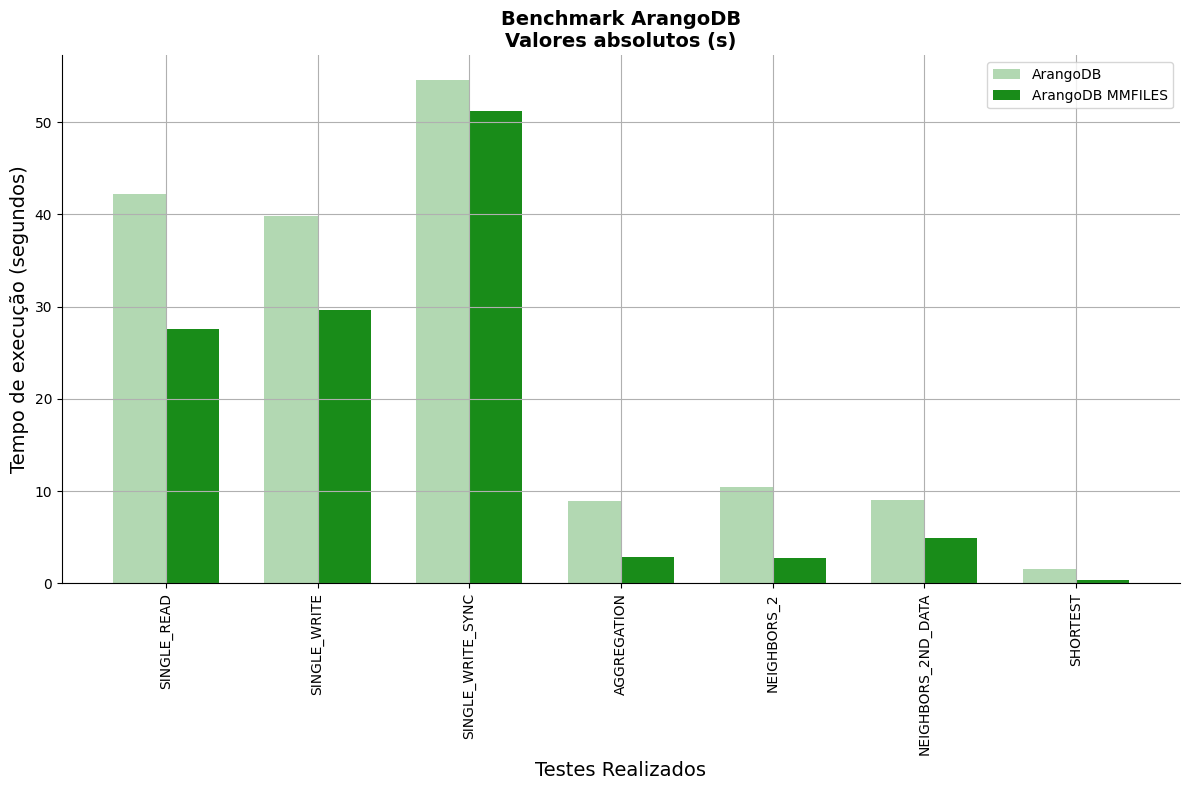

In [44]:
x = np.arange(len(labels_S))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

plt.grid()
fig.set_size_inches(12,8)

rects1 = ax.bar(x - width/2, adbS, width, label='ArangoDB', color='green', alpha=0.3)
rects2 = ax.bar(x + width/2, mmfS, width, label='ArangoDB MMFILES', color='green', alpha=0.9)

ax.set_ylabel('Tempo de execução (segundos)', fontsize=14)
ax.set_xlabel('Testes Realizados', fontsize=14)

ax.set_title('Benchmark ArangoDB\nValores absolutos (s)', fontsize=14, fontweight ='bold')

ax.set_xticks(x)
ax.set_xticklabels(labels_S, rotation='vertical')

ax.legend()
sns.despine()

fig.tight_layout()
plt.savefig('plot4.1.png')

In [45]:
#Reoranização dos dados para geração da visualização
p = results_raw[results_raw.METRIC == 'p']
p.set_index('SGBD_AND_METRIC', inplace=True)
p = p.iloc[:, 1:]

#Separação dos dados em variáveis
labels = list(results.keys()[1:])
adb = list(p.loc['ArangoDB (p)'].VALUE)
mmf = list(p.loc['ArangoDB MMFILES (p)'].VALUE)

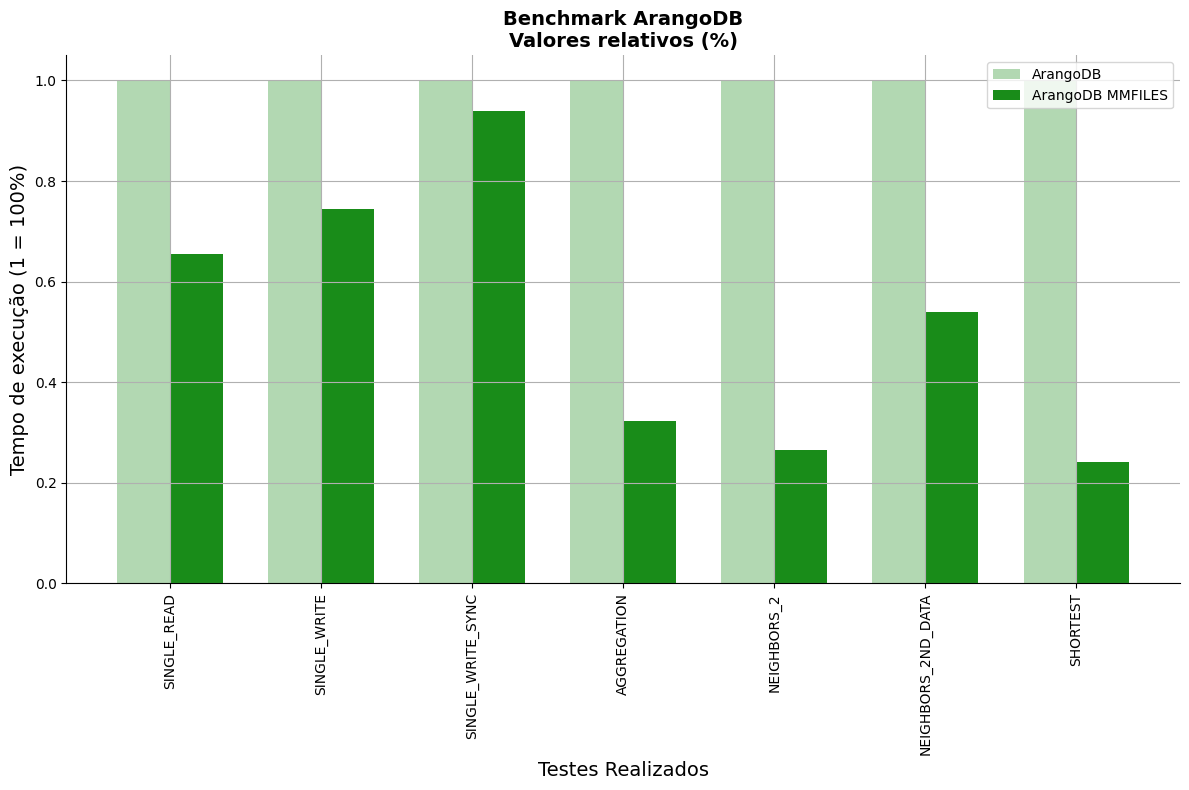

In [46]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()

plt.grid()
fig.set_size_inches(12,8)

rects1 = ax.bar(x - width/2, adb, width, label='ArangoDB', color='green', alpha=0.3)
rects2 = ax.bar(x + width/2, mmf, width, label='ArangoDB MMFILES', color='green', alpha=0.9)

ax.set_ylabel('Tempo de execução (1 = 100%)', fontsize=14)
ax.set_xlabel('Testes Realizados', fontsize=14)

ax.set_title('Benchmark ArangoDB\nValores relativos (%)', fontsize=14, fontweight ='bold')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')

ax.legend()
sns.despine()

fig.tight_layout()
plt.savefig('plot4.2.png')